This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.

In [86]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#loading data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data=pd.read_csv(url,names=columns)
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [88]:
data.shape

(32561, 15)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##feature engineering

In [90]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [91]:
#there are some places where ? presents.Let us check it.
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [92]:
data.replace(' ?',np.nan,inplace=True)
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

###salary

In [93]:
#categorise salary
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [94]:
data['salary']=data['salary'].replace({' <=50K':0,' >50K':1})
data['salary'].unique()

array([0, 1])

In [95]:
data['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


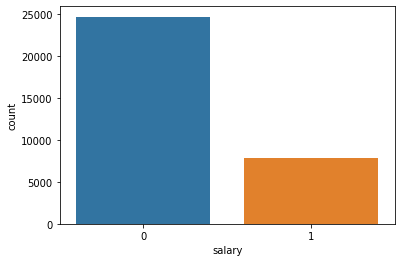

In [96]:
sns.countplot(data['salary'])

##age

In [97]:
data['age'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


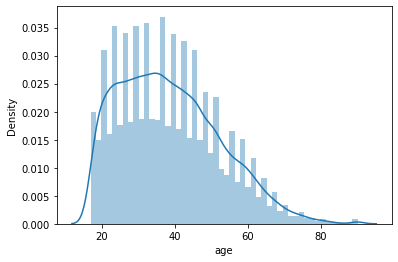

In [98]:
sns.distplot(data['age'])

In [99]:
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

##workclass

In [100]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [101]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [102]:
#Combine without pay and never worked and also replace nan with other group
data['workclass'].replace(' Without-pay',' Never-worked',inplace=True) 
data['workclass'].fillna(' other',inplace=True)
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' other', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

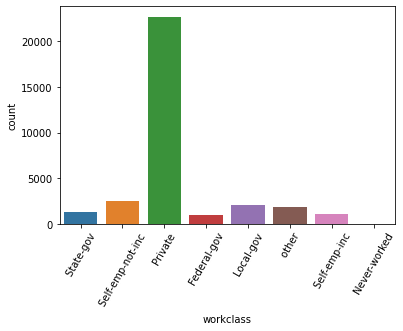

In [103]:
sns.countplot(data['workclass'])
plt.xticks(rotation=60)

##fnlwgt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


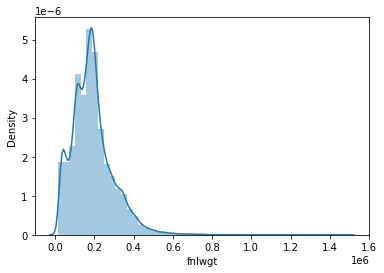

In [104]:
sns.distplot(data['fnlwgt'])

In [105]:
data['fnlwgt']=np.log(data['fnlwgt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


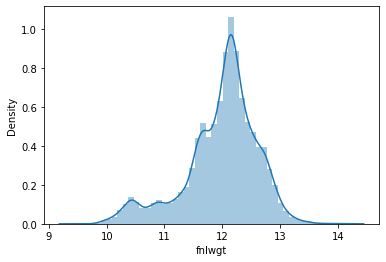

In [106]:
sns.distplot(data['fnlwgt'])

## education

In [107]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

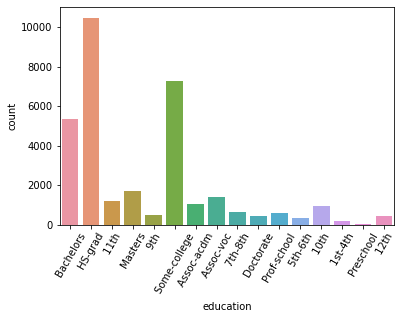

In [108]:
sns.countplot(data['education'])
plt.xticks(rotation=60)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

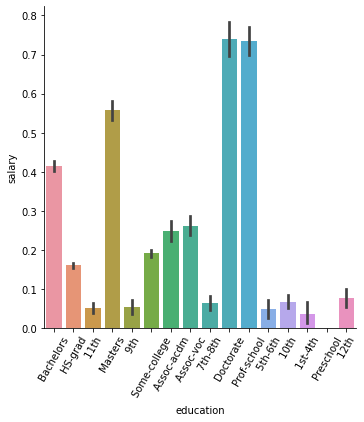

In [109]:
sns.catplot('education','salary',data=data,kind='bar')
plt.xticks(rotation=60)

In [110]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [111]:
data['education']=data['education'].apply(primary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

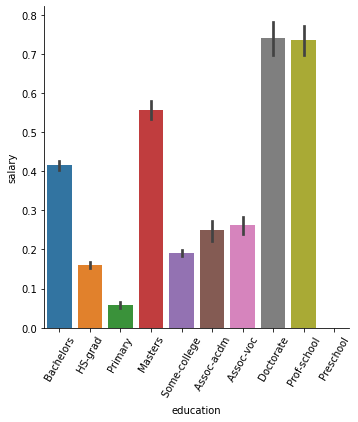

In [112]:
sns.catplot('education','salary',data=data,kind='bar')
plt.xticks(rotation=60)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


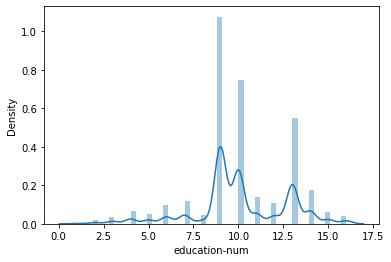

In [113]:
sns.distplot(data['education-num'])

##marital status

In [114]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [115]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

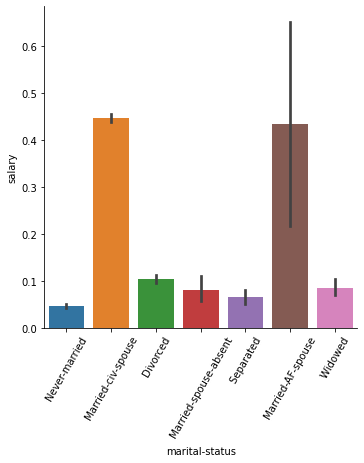

In [116]:
sns.catplot(x='marital-status',y='salary',data=data,kind='bar')
plt.xticks(rotation=60)

## occupation

In [117]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [118]:
data['occupation'].isna().sum()

1843

In [119]:
#replace nan wiith other group and combine armed forces into it
data['occupation'].replace(np.nan,'other',inplace=True)
data['occupation'].replace(' Armed-Forces','other',inplace=True)
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
other                 1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

## relationship

In [120]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

##race

In [121]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

##sex

In [122]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

## native country

In [123]:
data['native-country'].isna().sum()

583

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

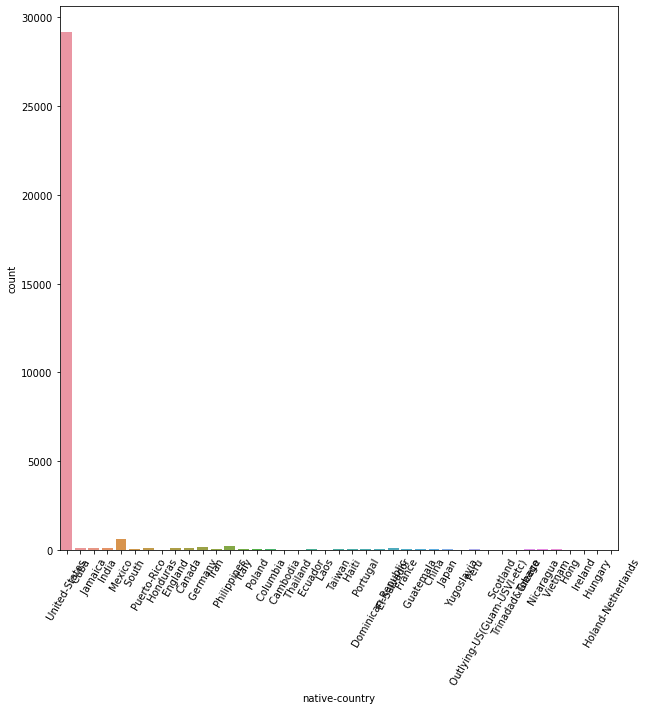

In [124]:
plt.figure(figsize=(10,10))
sns.countplot(data['native-country'])
plt.xticks(rotation=60)

In [125]:
#combining countries based on continent
def region(x):
  if x in [' Laos',' India',' China',' Japan',' Iran',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan',' Vietnam']:
    return 'Asia'
  elif x in [' Mexico',' United-States',' Canada',' Cuba',' Jamaica',' Haiti',' Puerto-Rico',' El-Salvador',' Dominican-Republic',' Guatemala',' Nicaragua'
               ,' Trinadad&Tobago',' Outlying-US(Guam-USVI-etc)',' Honduras']:
    return 'North America'
  elif x in [' Columbia',' South',' Peru',' Ecuador',' ']:
    return 'South America'
  elif x in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
    return 'Europe'

In [126]:
data['native-country']=data['native-country'].apply(region)

In [127]:
data['native-country'].value_counts()

North America    30588
Asia               671
Europe             521
South America      198
Name: native-country, dtype: int64

In [128]:
data['native-country'].isna().sum()

583

In [129]:
data['native-country'].replace(np.nan,'other',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

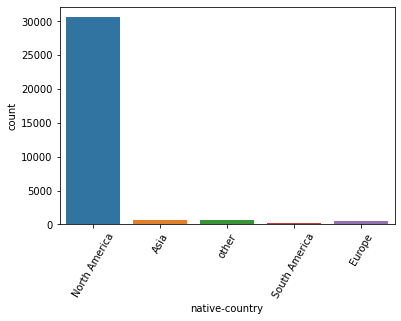

In [130]:
sns.countplot(data['native-country'])
plt.xticks(rotation=60)

In [131]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

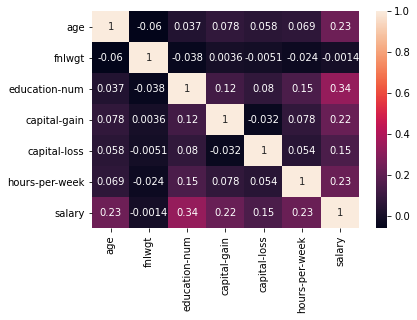

In [132]:
corr=data.corr()
sns.heatmap(data=corr,annot=True)

In [133]:
#fnlwgt has less values of corr.Hence we can drop it
data=data.drop(columns=['fnlwgt'],axis=1)


In [134]:
data.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North America,0


In [135]:
x=data.drop('salary',axis=1)
y=data['salary']

In [136]:
x1=pd.get_dummies(x,drop_first=True)

In [137]:
x1.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ other,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,education_Primary,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_other,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_Europe,native-country_North America,native-country_South America,native-country_other
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.3,random_state=100)

In [139]:
x_train.shape,x_test.shape

((22792, 54), (9769, 54))

## Logistic regression


In [141]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
from sklearn.metrics import accuracy_score
y_pred_train=model1.predict(x_train)
y_pred_test=model1.predict(x_test)

acc_1train=accuracy_score(y_train,y_pred_train)
acc_1test=accuracy_score(y_test,y_pred_test)

acc_1train,acc_1test




(0.84498946998947, 0.8478861705394616)

In [143]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred_test)
cm1

array([[6911,  517],
       [ 969, 1372]])

#Decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [ ]:
#tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model2,param_grid=grid_dt,cv=5,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.827, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.831, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best, score=0.858, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best, score=0.852, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best, score=0.856, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best, score=0.852, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitt

[Parallel(n_jobs=1)]: Done 12960 out of 12960 | elapsed: 15.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'splitter': 'best'}

In [145]:
model2_gs=DecisionTreeClassifier(criterion='entropy',max_depth=10,
                              min_samples_leaf= 4,min_samples_split= 9,splitter= 'best')
model2_gs.fit(x_train,y_train)

y_pred_train2_gs=model2_gs.predict(x_train)
y_pred_test2_gs=model2_gs.predict(x_test)

acc_2train_gs=accuracy_score(y_train,y_pred_train2_gs)
acc_2test_gs=accuracy_score(y_test,y_pred_test2_gs)

acc_2train_gs,acc_2test_gs

(0.8671024921024921, 0.8584297266864571)

# Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

acc_3train=accuracy_score(y_train,y_pred_train3)
acc_3test=accuracy_score(y_test,y_pred_test3)

acc_3train,acc_3test

(0.9801246051246051, 0.8467601596888116)

In [ ]:
grid_rf= {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [147]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(model3,param_grid=grid_rf,cv=5,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV] max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.759, total=   0.1s
[CV] max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.759, total=   0.1s
[CV] max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.851, total=   0.1s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.855, total=   0.1s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.857, total=   0.1s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.856, total=   0.1s
[CV] max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5,

[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed: 40.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid.best_params_

In [148]:
model3=RandomForestClassifier(max_depth=9,max_features= 'auto',
                               min_samples_leaf= 3,
                               min_samples_split= 6,
                               n_estimators=30)
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

acc_3train=accuracy_score(y_train,y_pred_train3)
acc_3test=accuracy_score(y_test,y_pred_test3)

acc_3train,acc_3test

(0.8606528606528606, 0.8578155389497389)

#KNN classifier

In [150]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()

In [ ]:
grid_knn = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [ ]:
grid = GridSearchCV(knn,param_grid=grid_knn,verbose=3)
grid.fit(x_train,y_train)


In [ ]:
grid.best_params_


In [151]:
model4 = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=9)
model4.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [152]:
y_pred_train4=model4.predict(x_train)
y_pred_test4=model4.predict(x_test)

acc_4train=accuracy_score(y_train,y_pred_train4)
acc_4test=accuracy_score(y_test,y_pred_test4)

acc_4train,acc_4test

(0.8755703755703755, 0.8462483365748797)

#XGBoost

In [153]:
from xgboost import XGBClassifier
model5=XGBClassifier()


In [ ]:
grid_xg={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [ ]:
grid = GridSearchCV(model5,param_grid=grid_xg,verbose=3)
grid.fit(x_train,y_train)

In [80]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}

In [154]:
model5 = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=300)
model5.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [155]:
y_pred_train5=model5.predict(x_train)
y_pred_test5=model5.predict(x_test)

acc_5train=accuracy_score(y_train,y_pred_train5)
acc_5test=accuracy_score(y_test,y_pred_test5)

acc_5train,acc_5test

(0.9043085293085293, 0.8645716040536391)

In [156]:
result=pd.DataFrame()
result['algorithm']=['Logistic regression','Decision tree','Random forest','KNN','XGBoost']
result['accuracy score']=[acc_1test,acc_2test_gs,acc_3test,acc_4test,acc_5test]
result

,algorithm,accuracy score
0,Logistic regression,0.847886
1,Decision tree,0.858430
2,Random forest,0.857816
3,KNN,0.846248
4,XGBoost,0.864572


#From all of the classification algorithms, XGBoost is the best algorithm for the given dataset.